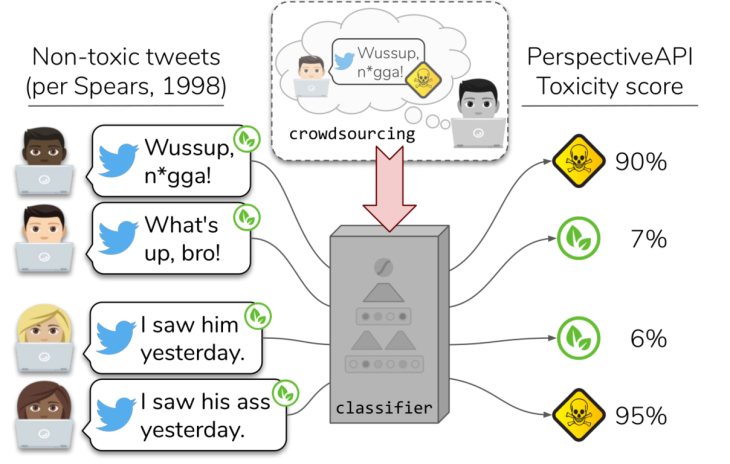


# Hate Speech Detection Model

### Author: Lauro Cesar Ribeiro

The term hate speech is understood as any type of verbal, written or behavioural communication that attacks or uses derogatory or discriminatory language against a person or group based on what they are, in other words, based on their religion, ethnicity, nationality, race, colour, ancestry, sex or another identity factor. 

Hate Speech Detection is generally a task of sentiment classification. So for training, a model that can classify hate speech from a certain piece of text can be achieved by training it on a data that is generally used to classify sentiments. So for the task of hate speech detection model, I will use the Twitter data.

In [1]:
import pandas as pd
train = pd.read_csv('train.csv')
print("Training Set:"% train.columns, train.shape,len(train))
test = pd.read_csv('test.csv')
print("Test Set:"% test.columns, test.shape,len(test))

Training Set: (31962, 3) 31962
Test Set: (17197, 2) 17197


# Data Cleaning 

Data cleaning is the process of preparing incorrectly formated data for analysis by deleting or modifying the incorrectly formatted data which is generally not necessary or useful for data analysis, as it can hinder the process or provide inaccurate results.

In [3]:
import re

def clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    return df

test_clean = clean_text(test, "tweet")
train_clean = clean_text(train, "tweet")

### Handling Imbalanced data for Hate Speech Detection Model

If you will deeply analyse the task we are working on with context to the data we are using, you will find that the tweets regarding hate speeches are comparatively lesser than others, so this is a situation of an unbalanced data.

If we will fit this data to train our hate speech detection model, then the model will not generalize any hate speech because the data with context to the hate speech is very less than the positive ones. So in this situation, we need to prepare the data to fit properly in our model.

There are a number of methods you can use to deal with this. One approach is to use either oversampling or downsampling. In the case of oversampling, we use a function that repeatedly samples, with replacement, from the minority class until the class is the same size as the majority.

In [4]:
from sklearn.utils import resample
train_majority = train_clean[train_clean.label==0]
train_minority = train_clean[train_clean.label == 1]
train_minority_upsampled = resample(train_minority,
                                   replace = True,
                                   n_samples = len(train_majority),
                                   random_state=123)

train_upsampled = pd.concat([train_minority_upsampled, train_majority])
train_upsampled['label'].value_counts()

1    29720
0    29720
Name: label, dtype: int64

# Creating a Pipeline

For simplicity and reproducibility of the hate speech detection model, I will use the Scikit-Learn’s pipeline with an SGDClassifier, before training our model

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier

pipeline_sgd = Pipeline([('vect', CountVectorizer()),
                        ('tfidf', TfidfTransformer()),
                        ('nb', SGDClassifier()),])

## Training the Hate Speech Detection Model

Now, before training the model, let’s split the data into a training set and a test set

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_upsampled['tweet'],
                                                   train_upsampled['label'], random_state=0)

Now let’s train the model and predict the results on the test set using the F1 score method

In [7]:
model = pipeline_sgd.fit(X_train, y_train)
y_predict = model.predict(X_test)

from sklearn.metrics import f1_score
f1_score(y_test, y_predict)

0.969729297239632

#### So we got an F1 score of 0.96 per cent which is generally appreciatable. This model can now be deployed and used in production.